In [1]:
%reset -f

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
def cm2inch(cm: float) -> float:
    return cm * (1 / 2.54)

In [4]:
colors ={
    'red': '#EB1E2C',
    'orange1': '#FD6F30',
    'orange2': '#F9A729',
    'yellow': '#F9D23C',
    'green': '#5FBB68',
    'blue': '#00A5E3',
    'teal': '#64CDCC',
    'aqua': '#91DCEA',
    'purple': '#A4A4D5',
    'ligth_purple': '#BBC9E5',
}

# Llamado de los datos

In [5]:
columns_dataframe = [
    'fLength'
  , 'fWidth'
  , 'fSize'
  , 'fConc'
  , 'fConc1'
  , 'fAsym'
  , 'fM3Long'
  , 'fM3Trans'
  , 'fAlpha'
  , 'fDist'
  , 'class'
]

In [6]:
df = pd.read_csv('Magic Gamma Telescope Data Set\magic+gamma+telescope\magic04.data', names = columns_dataframe)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\vonst\AppData\Local\Temp\ipykernel_21360\1038618220.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('Magic Gamma Telescope Data Set\magic+gamma+telescope\magic04.data', names = columns_dataframe)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


# Sin StandardScaler

## Gráfica de cada una de las variables de forma individual

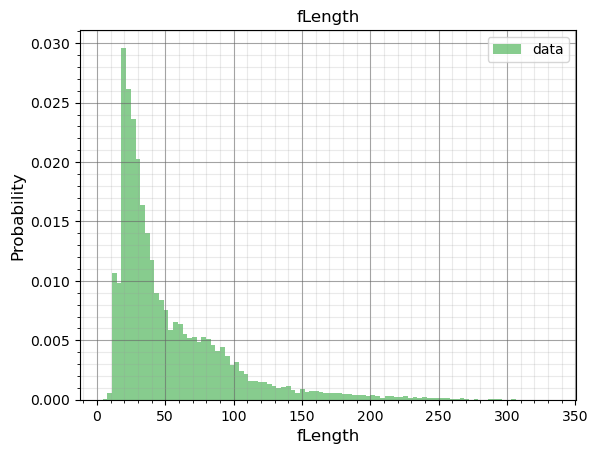

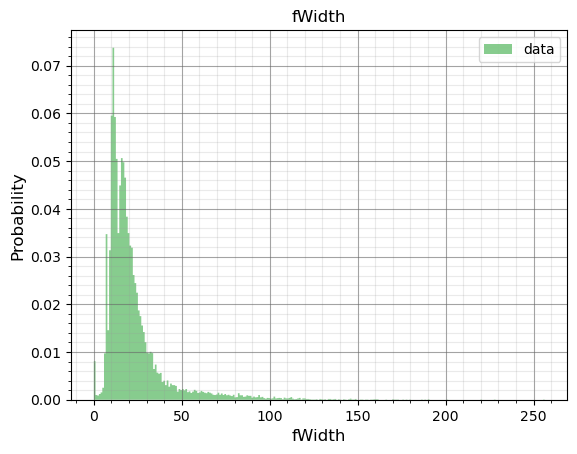

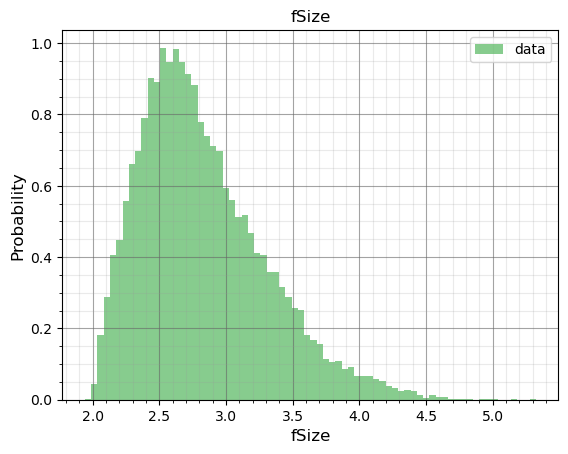

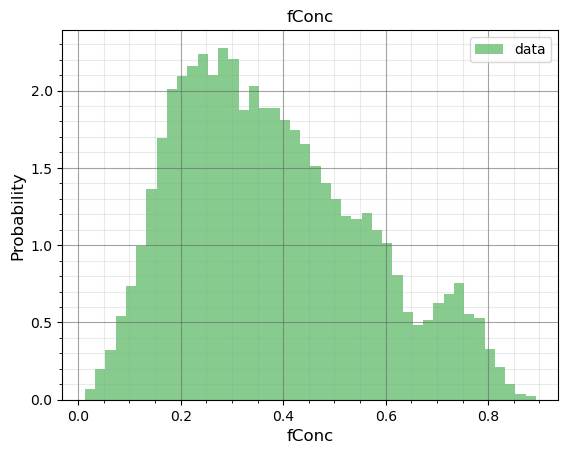

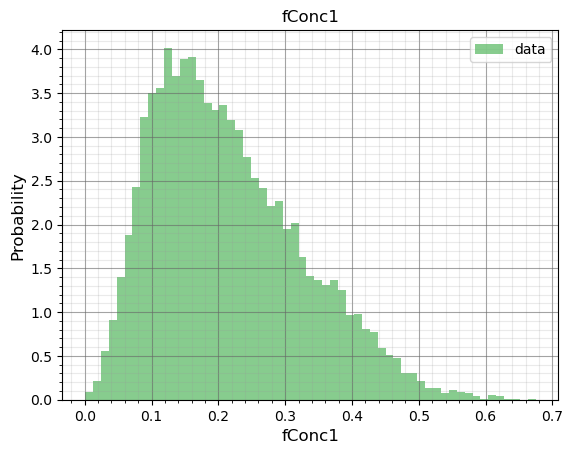

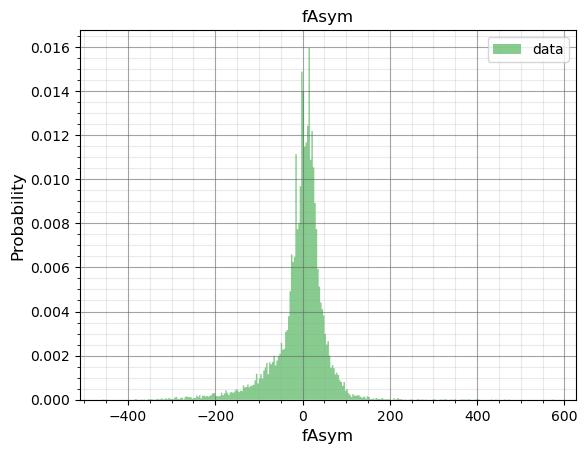

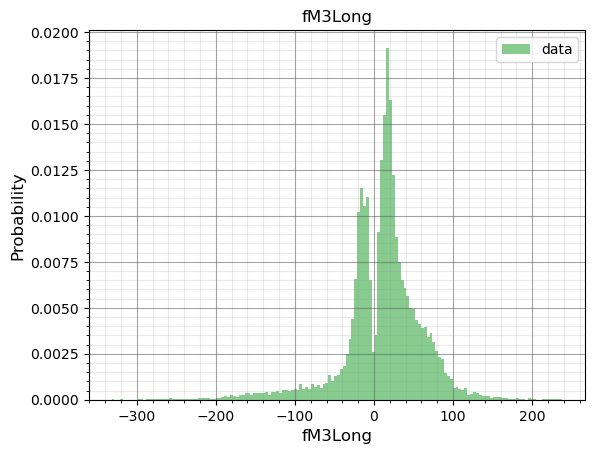

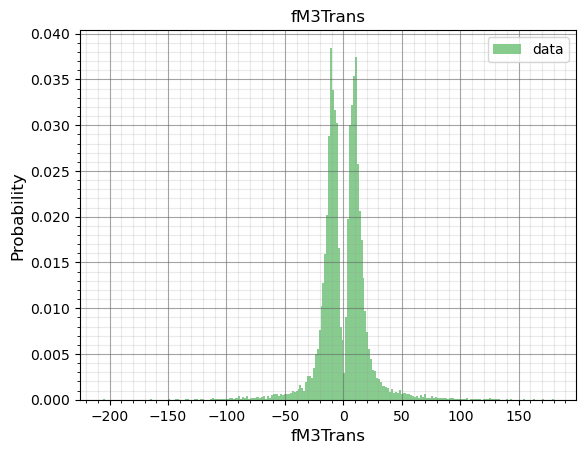

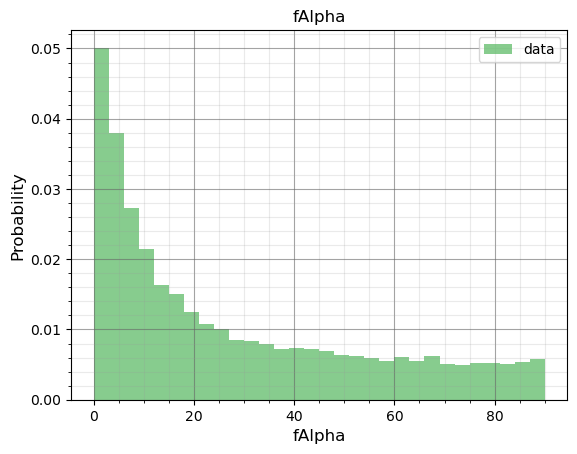

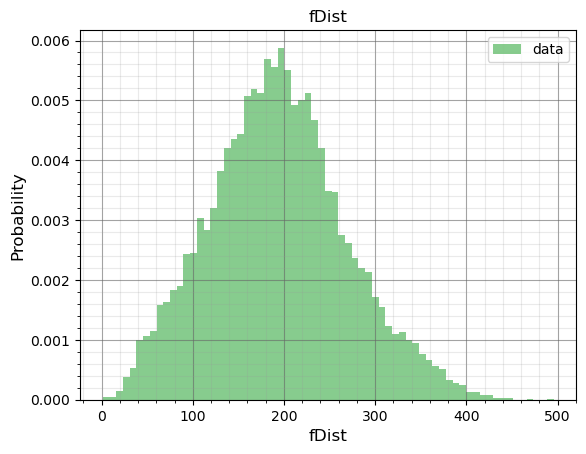

In [7]:
for i in columns_dataframe[:-1]:
  data_hist = df[i]

  # Freedman-Diaconis rule
  q75, q25 = np.percentile(data_hist, [75 ,25])
  iqr = q75 - q25
  h = 2 * iqr * (len(data_hist) ** (-1/3))
  b = (max(data_hist) - min(data_hist)) / h
  b = int(round(b, 0))

  plt.hist(data_hist, bins = b, color = colors['green'], label = 'data', log = False, histtype = "stepfilled", alpha = 0.75, density = True)
  
  plt.legend(framealpha = 0.8, fontsize = "medium", facecolor = "white")
  plt.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
  plt.minorticks_on()
  plt.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)

  plt.ylabel('Probability', fontsize = 'large')
  plt.xlabel(i, fontsize = 'large')
  plt.title(i, fontsize = 'large')

  # plt.savefig('graph_name.jpg', dpi = 600, edgecolor = 'none')

  plt.show()

## Gráfica de cada una de las variables en forma de subplot

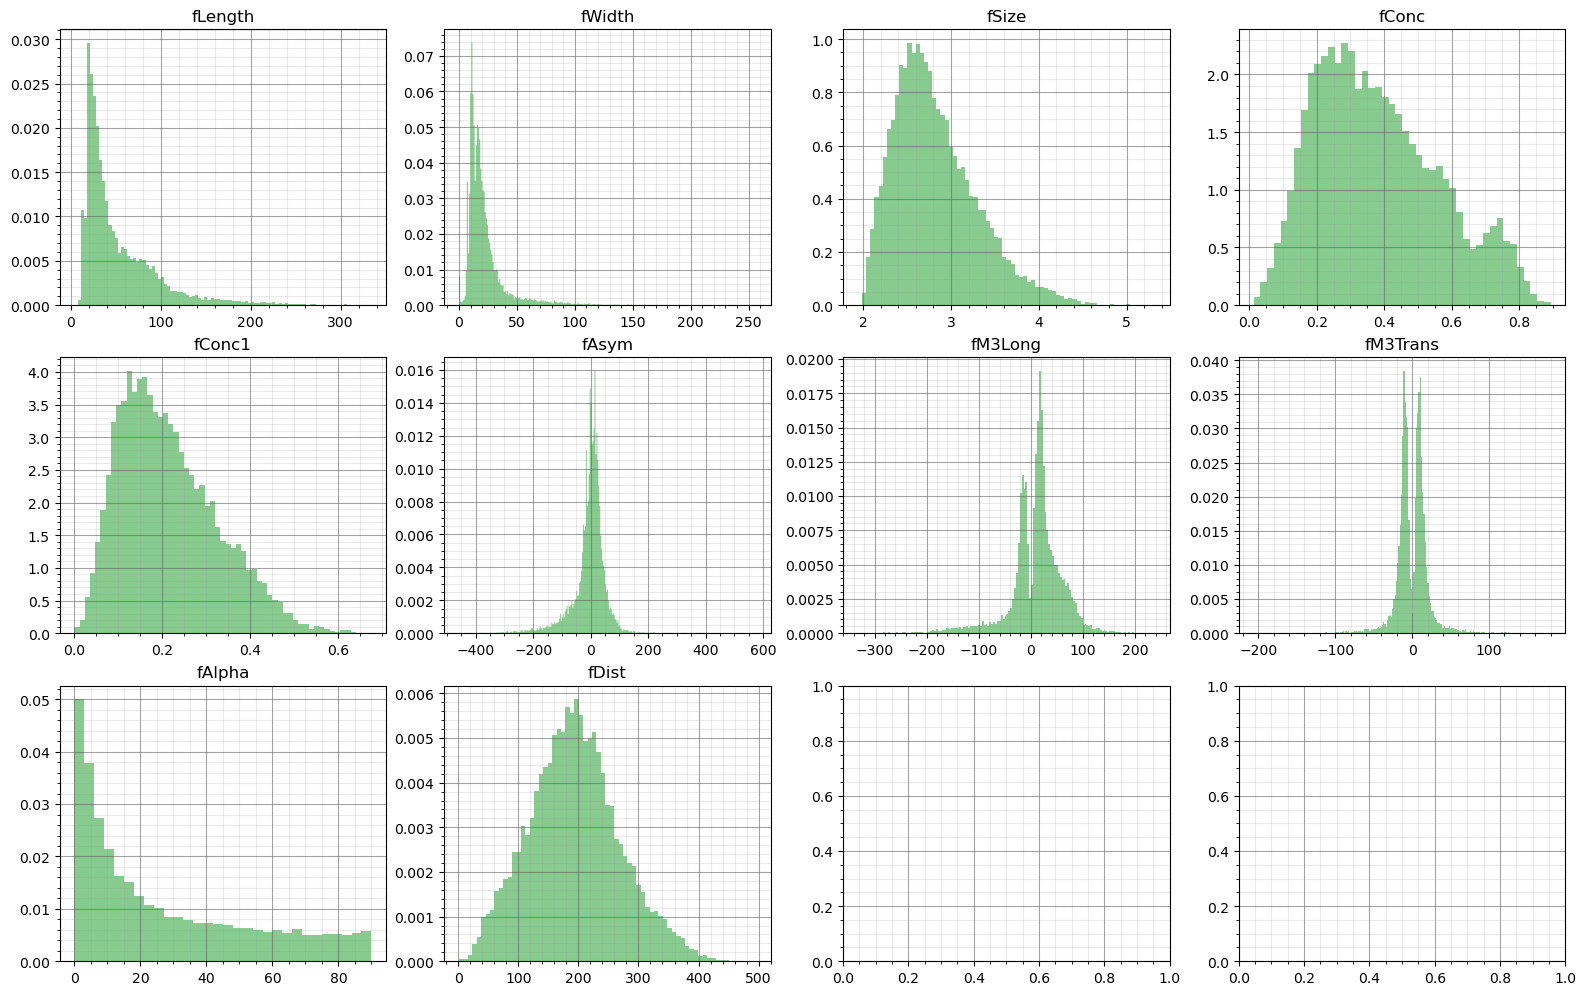

In [11]:
fig, axes = plt.subplots(3, 4, facecolor = 'white', edgecolor = 'white', constrained_layout = True, sharex = False, sharey = False, figsize = (cm2inch(40), cm2inch(25)))

((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = axes

for i in axes:
    for j in range(len(i)):
        i[j].set(facecolor = 'white', frame_on = True)
        i[j].grid(visible = False)
        i[j].grid(visible = True, which = 'major', color = '#666666', linestyle = '-', alpha = 0.6)
        i[j].minorticks_on()
        i[j].grid(visible = True, which = 'minor', color = '#999999', linestyle = '-', alpha = 0.2)

axn = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

for i in range(len(axn)):
  if i < len(columns_dataframe) - 1:
    data_hist = df[columns_dataframe[i]]

    # Freedman-Diaconis rule
    q75, q25 = np.percentile(data_hist, [75, 25])
    iqr = q75 - q25
    h = 2 * iqr * (len(data_hist) ** (-1/3))
    b = (max(data_hist) - min(data_hist)) / h
    b = int(round(b, 0))

    axn[i].hist(data_hist, bins = b, color = colors['green'], label = 'data', log = False, histtype = "stepfilled", alpha = 0.75, density = True)
    axn[i].set_title(columns_dataframe[i])
    
  else:
     break

  # plt.ylabel('Probability', fontsize = 'large')
  # plt.xlabel(i, fontsize = 'large')
  # plt.title(i, fontsize = 'large')

plt.show()

# StandarScaler

Conversión de las columnas en arrays con el objetivo de aplicar StandarScaler

In [12]:
df[df.columns[:-1]].head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [13]:
x = df[df.columns[:-1]].values
x

array([[ 28.7967,  16.0021,   2.6449, ...,  -8.2027,  40.092 ,  81.8828],
       [ 31.6036,  11.7235,   2.5185, ...,  -9.9574,   6.3609, 205.261 ],
       [162.052 , 136.031 ,   4.0612, ..., -45.216 ,  76.96  , 256.788 ],
       ...,
       [ 75.4455,  47.5305,   3.4483, ...,  -9.4662,  30.2987, 256.5166],
       [120.5135,  76.9018,   3.9939, ..., -63.8389,  84.6874, 408.3166],
       [187.1814,  53.0014,   3.2093, ...,  31.4755,  52.731 , 272.3174]])

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(x) 
X

array([[-0.57722602, -0.33680419, -0.38113037, ..., -0.40584194,
         0.47681587, -1.49786555],
       [-0.51096889, -0.57002666, -0.64859479, ..., -0.49009359,
        -0.81541816,  0.15312459],
       [ 2.56827756,  6.20585836,  2.61578306, ..., -2.18302986,
         1.88922413,  0.84263513],
       ...,
       [ 0.52392318,  1.38177927,  1.31887687, ..., -0.4665087 ,
         0.10163583,  0.83900338],
       [ 1.58775746,  2.98278123,  2.47337518, ..., -3.07720555,
         2.18525981,  2.87032093],
       [ 3.16145936,  1.67999288,  0.81314905, ...,  1.49930076,
         0.96101431,  1.05044239]])

In [15]:
df_X = pd.DataFrame(X, columns = columns_dataframe[:-1])
df_X.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,-0.577226,-0.336804,-0.381130,0.062759,-0.148923,0.541042,0.224818,-0.405842,0.476816,-1.497866
1,-0.510969,-0.570027,-0.648595,0.820383,1.471776,0.516919,0.260364,-0.490094,-0.815418,0.153125
2,2.568278,6.205858,2.615783,-1.875883,-1.773241,2.044992,-1.478536,-2.183030,1.889224,0.842635
3,-0.694768,-0.687259,-1.029478,1.282069,1.606608,0.532771,-0.333515,-0.355359,-0.658804,-1.031463
4,0.516622,0.476384,0.711157,-0.347506,-0.284660,-0.020200,0.353086,1.036620,-0.881039,2.176427


Ahora se muestra el funcionamiento de StandardScaler. Si calculamos el promedio por columnas, axis = 0, es decir, como cada fila es un registro de todas las columnas, un registro horizontal donde cada columna es una variable diferente, lo que hace es calcular el promedio y desviación estándar de forma vertical, por cada columna, cada variable, fLength, fWidth, etc... StandardScaler lo que hace es que ese promedio sea cero y la desviación estándar sea 1

In [21]:
print(
    '\npromedio:', np.mean(x, axis = 0)
  , '\ndesviasión estandar:', np.std(x, axis = 0)
)


promedio: [ 53.25015393  22.18096622   2.82501696   0.38032707   0.21465713
  -4.33174516  10.54554482   0.24972596  27.64570668 193.81802647] 
desviasión estandar: [42.36374124 18.34557401  0.47258622  0.18280834  0.11050789 59.20450555
 50.9987773  20.82689143 26.10293429 74.72982238]


In [20]:
print(
    '\npromedio:', np.mean(X, axis = 0)
  , '\ndesviasión estandar:', np.std(X, axis = 0)
)


promedio: [ 7.17267115e-17 -1.19544519e-16 -2.24145973e-16 -3.02597064e-16
  1.12820140e-16 -5.97722596e-18  4.18405817e-17 -9.71299218e-18
  1.19544519e-17 -8.96583894e-18] 
desviasión estandar: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Gráfica de cada una de las variables de forma individual

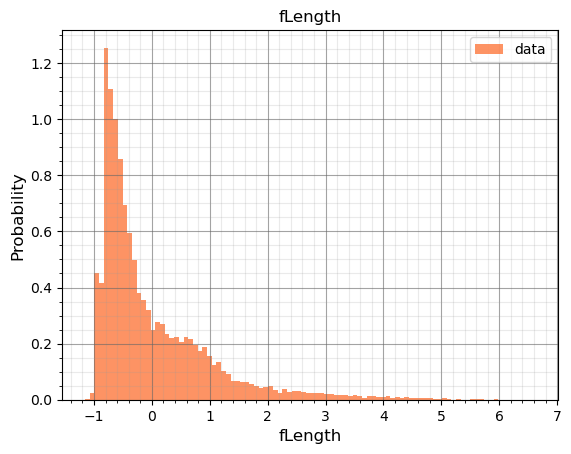

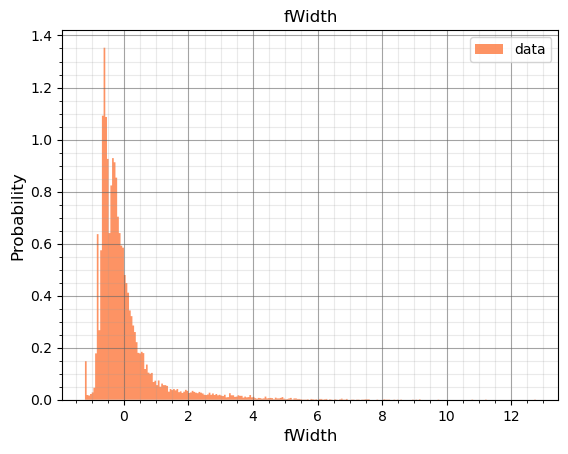

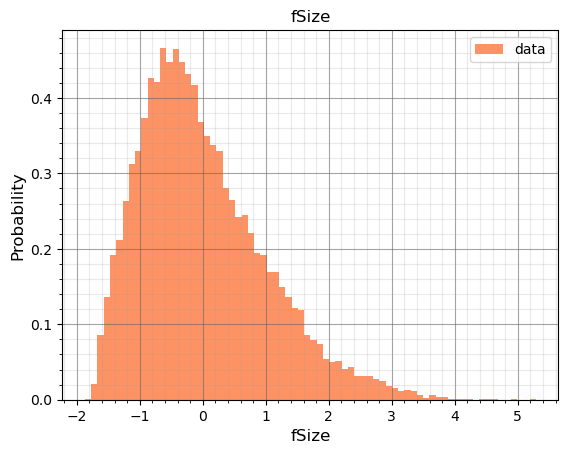

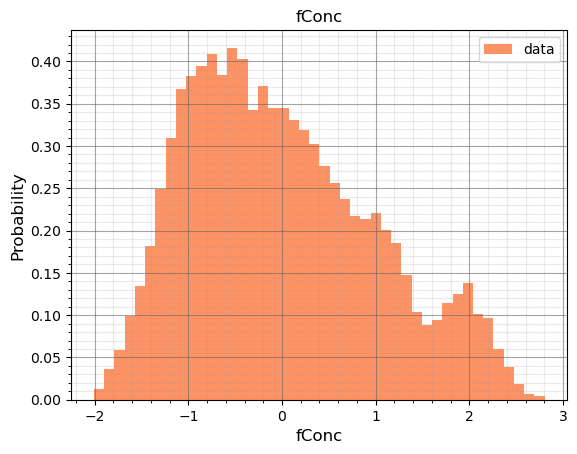

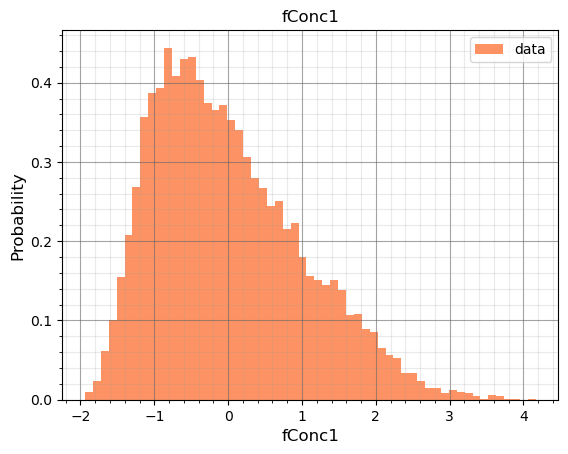

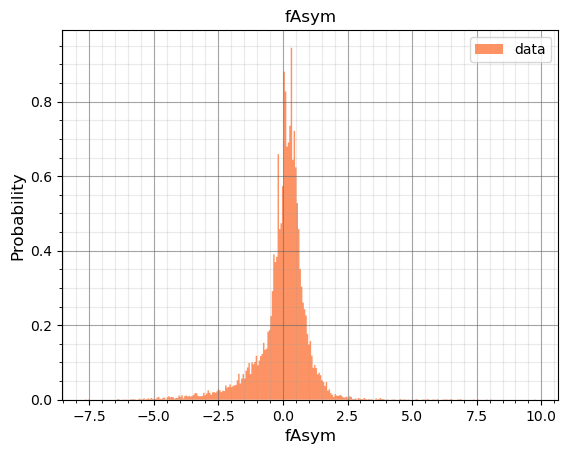

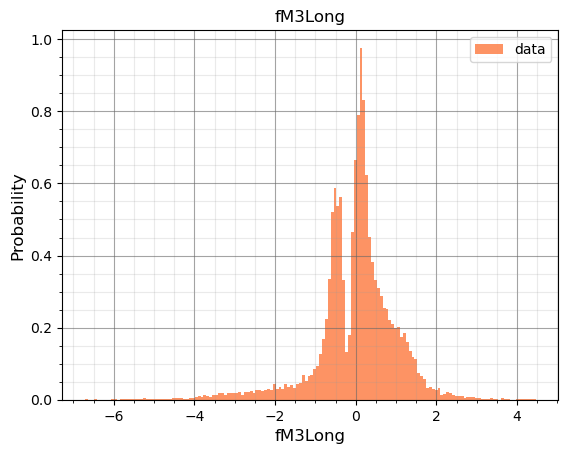

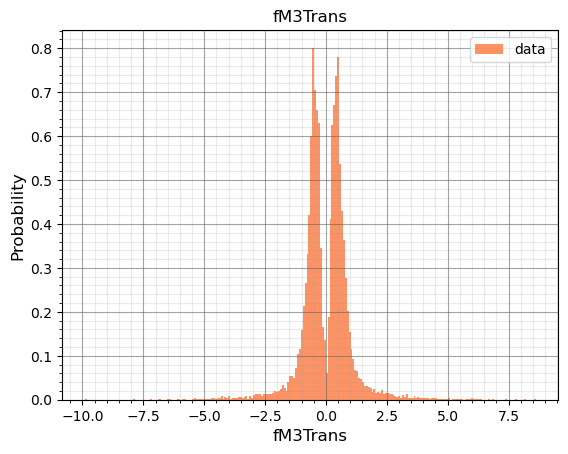

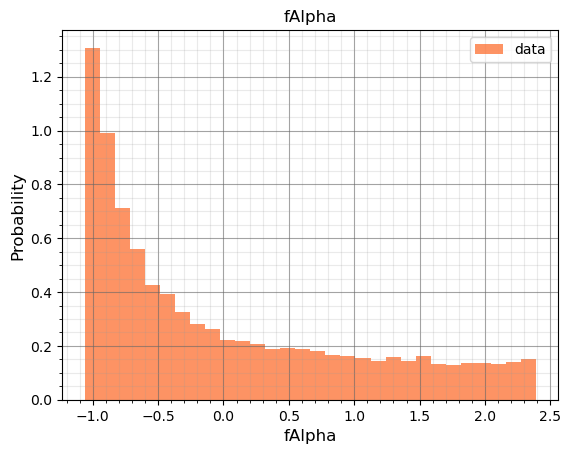

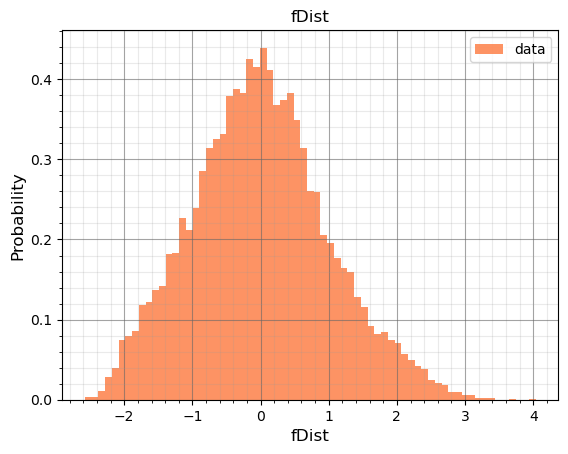

In [16]:
for i in columns_dataframe[:-1]:
  data_hist = df_X[i]

  # Freedman-Diaconis rule
  q75, q25 = np.percentile(data_hist, [75 ,25])
  iqr = q75 - q25
  h = 2 * iqr * (len(data_hist) ** (-1/3))
  b = (max(data_hist) - min(data_hist)) / h
  b = int(round(b, 0))

  plt.hist(data_hist, bins = b, color = colors['orange1'], label = 'data', log = False, histtype = "stepfilled", alpha = 0.75, density = True)
  
  plt.legend(framealpha = 0.8, fontsize = "medium", facecolor = "white")
  plt.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
  plt.minorticks_on()
  plt.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)

  plt.ylabel('Probability', fontsize = 'large')
  plt.xlabel(i, fontsize = 'large')
  plt.title(i, fontsize = 'large')

  plt.show()

## Gráfica de cada una de las variables en forma de subplot

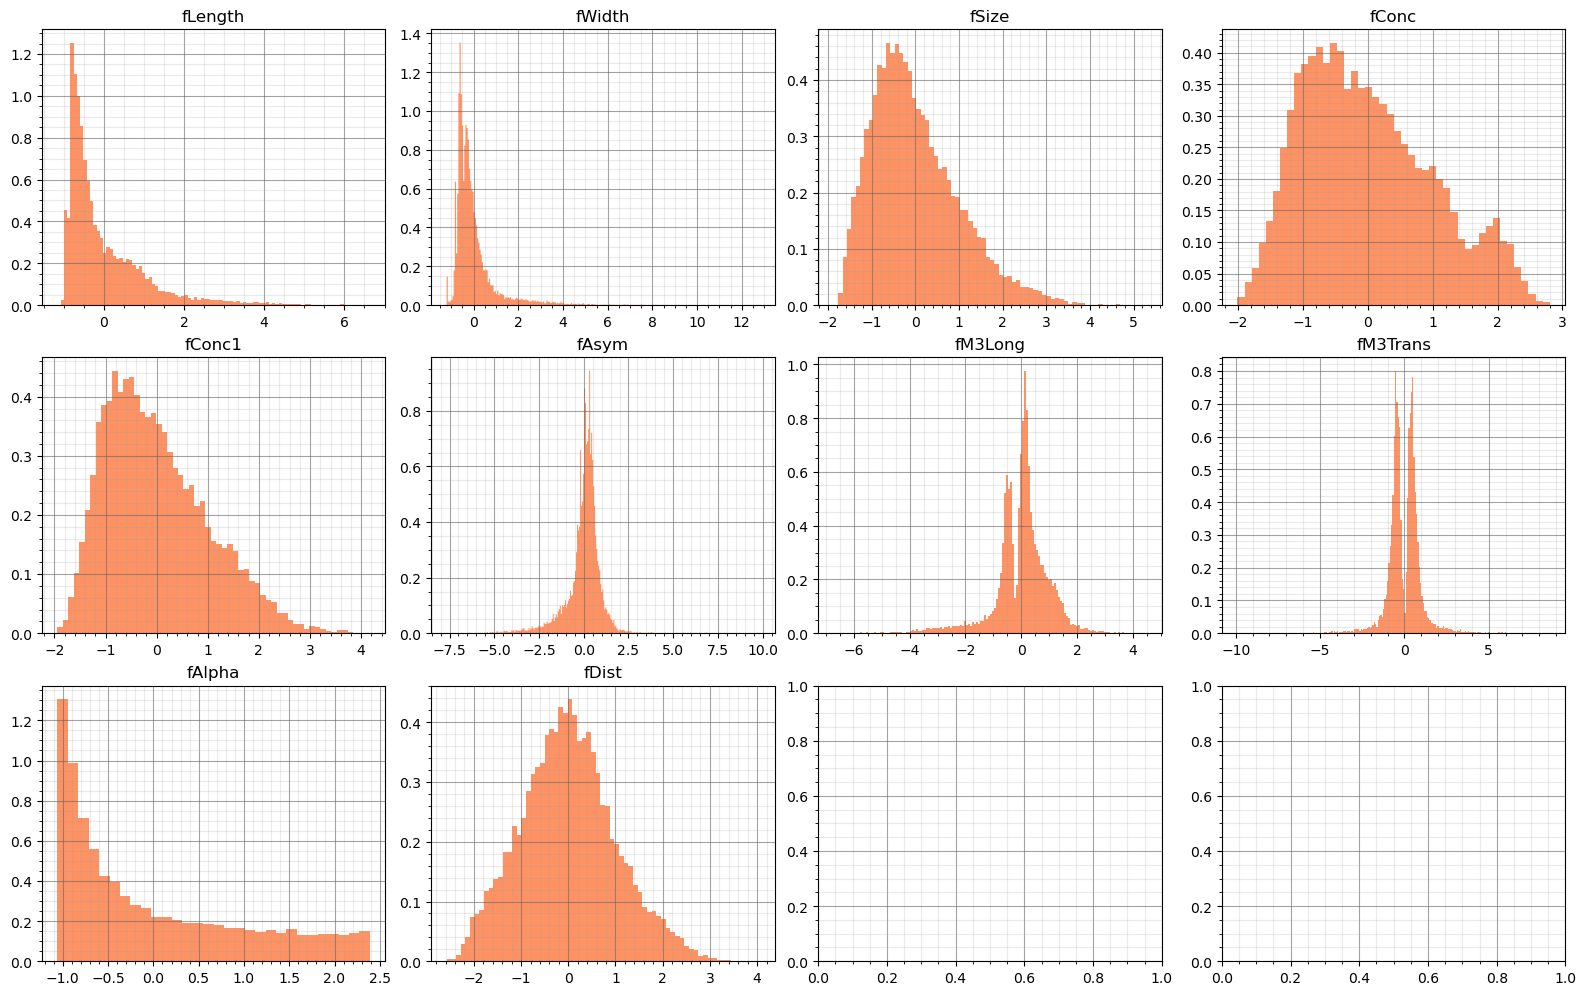

In [17]:
fig, axes = plt.subplots(3, 4, facecolor = 'white', edgecolor = 'white', constrained_layout = True, sharex = False, sharey = False, figsize = (cm2inch(40), cm2inch(25)))

((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = axes

for i in axes:
    for j in range(len(i)):
        i[j].set(facecolor = 'white', frame_on = True)
        i[j].grid(visible = False)
        i[j].grid(visible = True, which = 'major', color = '#666666', linestyle = '-', alpha = 0.6)
        i[j].minorticks_on()
        i[j].grid(visible = True, which = 'minor', color = '#999999', linestyle = '-', alpha = 0.2)

axn = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

for i in range(len(axn)):
  if i < len(columns_dataframe) - 1:
    data_hist = df_X[columns_dataframe[i]]

    # Freedman-Diaconis rule
    q75, q25 = np.percentile(data_hist, [75, 25])
    iqr = q75 - q25
    h = 2 * iqr * (len(data_hist) ** (-1/3))
    b = (max(data_hist) - min(data_hist)) / h
    b = int(round(b, 0))

    axn[i].hist(data_hist, bins = b, color = colors['orange1'], label = 'data', log = False, histtype = "stepfilled", alpha = 0.75, density = True)
    axn[i].set_title(columns_dataframe[i])
    
  else:
     break
  
plt.show()